# Analyze the loss based on the simulations runtime

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

#os.environ['JAX_PLATFORM_NAME'] = "cpu"
#os.environ['JAX_PLATFORMS'] = "cpu"

In [2]:
import jax.numpy as jnp
import jax

import numpy as onp

import matplotlib.pyplot as plt

from simulation.simulate_full import run_entire_simulation

from analyzers import defaultvalues as dv, database, loss as loss_anaylzer

/home/florian/anaconda3/envs/jaxidp/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [3]:
scan_space = jnp.linspace(3.0000, 3.0001, 8)
taut_values = onp.array(onp.linspace(30, 300, 30), dtype=int)

In [4]:
def get_sim_result(lj_sigma_oo, tau_t):
    return run_entire_simulation(lj_sigma_oo, dv.N_STEPS, dv.N_MOLECULES_PER_AXIS, dv.N_SNAPSHOTS, dv.N_Q, 1, tau_t)

In [5]:
database.set_filename("../data/loss_analyzer/taut_scan.npz")

Calculate losses over the scan space for each runtime from the array

In [6]:
all_losses = []

for taut in taut_values:
    existing_keys = database.get_existing_keys()
    if taut in existing_keys:
        print(f"Skipping {taut}, was already computed")
        continue

    print(f"=== Running for tau_t={taut} ===")
    reference = get_sim_result(dv.LJ_SIGMA_OO, taut)
    losses = jax.vmap(lambda lj_sigma_oo: loss_anaylzer.L1_loss(get_sim_result(lj_sigma_oo, taut), reference))(scan_space)
            
    jitter = loss_anaylzer.get_loss_jitter(losses)
    print(f"Jitter: {jitter}")

    database.save_intermediate_result(taut, losses)

=== Running for tau_t=30 ===
Jitter: 0.00019776009416348097
=== Running for tau_t=39 ===
Jitter: 0.00020229797621244144
=== Running for tau_t=48 ===
Jitter: 0.00018232557270889954
=== Running for tau_t=57 ===
Jitter: 0.00016832346606230518
=== Running for tau_t=67 ===
Jitter: 0.00034323681815898925
=== Running for tau_t=76 ===
Jitter: 0.00024181189419006968
=== Running for tau_t=85 ===
Jitter: 0.00022523528125335717
=== Running for tau_t=95 ===
Jitter: 0.00033141537355168036
=== Running for tau_t=104 ===
Jitter: 0.0002803442150070329
=== Running for tau_t=113 ===
Jitter: 0.0001947019195126004
=== Running for tau_t=123 ===
Jitter: 0.000152794985680369
=== Running for tau_t=132 ===
Jitter: 0.00025855387893092735
=== Running for tau_t=141 ===
Jitter: 0.00023664868347614607
=== Running for tau_t=151 ===
Jitter: 0.0001365624238518325
=== Running for tau_t=160 ===
Jitter: 0.0003680679137027773
=== Running for tau_t=169 ===
Jitter: 0.00027273622701521136
=== Running for tau_t=178 ===
Jitter: 

# Plot
Skip previous if data is already available

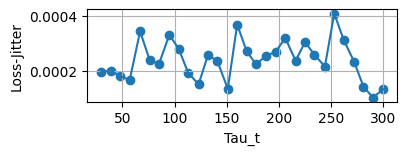

In [8]:
keys, values = database.load_result()
jitter_values = [loss_anaylzer.get_loss_jitter(v) for v in values]

plt.plot(keys, jitter_values)
plt.scatter(keys, jitter_values)
plt.xlabel("Tau_t")
plt.ylabel("Loss-Jitter")

plt.grid()
plt.gcf().set_size_inches(4, 1.2)
plt.savefig("../plots/analysis_loss_nmolecules.svg")
plt.show()